Chapter 04
# 非网格数据插值
Book_6《数据有道》 | 鸢尾花书：从加减乘除到机器学习

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

In [2]:
def surface(x1,x2):

    v = (x1 + x2)*np.exp(-(x1**2 + x2**2))
    return v

In [3]:
X_scatter = np.random.uniform(-1,1,(25,2))
yy_scatter = surface(X_scatter[:,0],X_scatter[:,1])

x1_grid = np.linspace(-1, 1, 100)
x2_grid = np.linspace(-1, 1, 100)
xx1_grid, xx2_grid = np.meshgrid(x1_grid, x2_grid)

In [4]:
methods = ['nearest','linear', 'cubic']

C:\Users\james\AppData\Local\Temp\ipykernel_14452\346235457.py:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx1_grid, xx2_grid, yy_interp_2D, shading='flat', **lims)


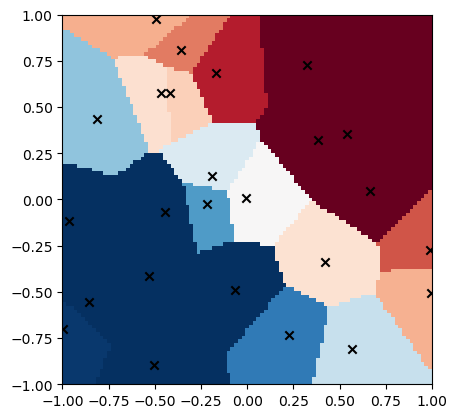

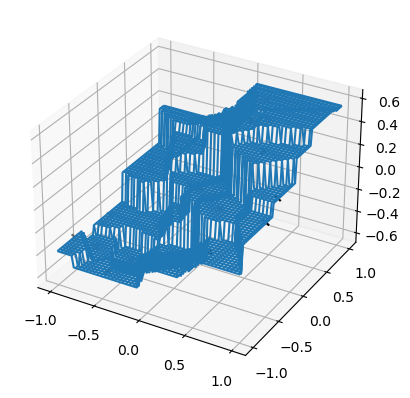

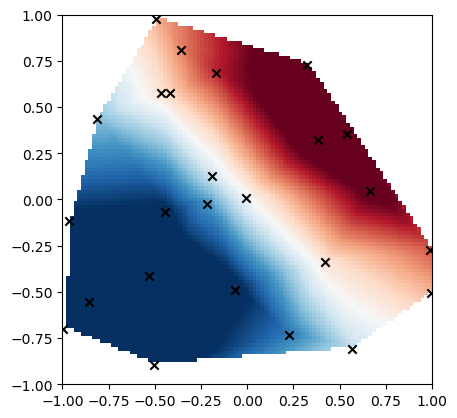

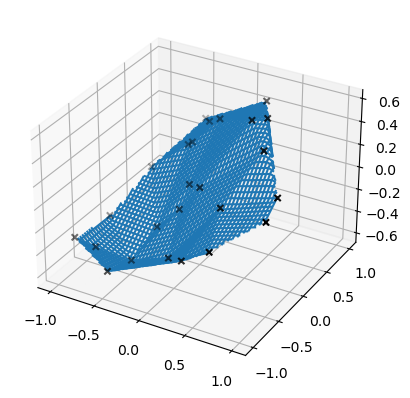

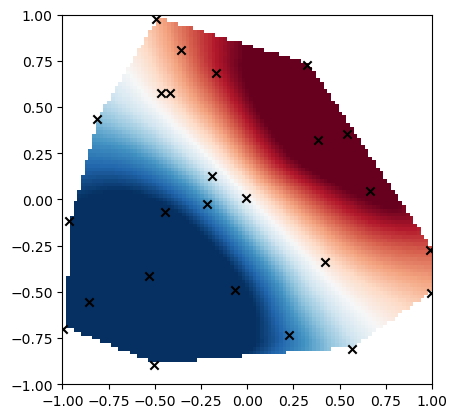

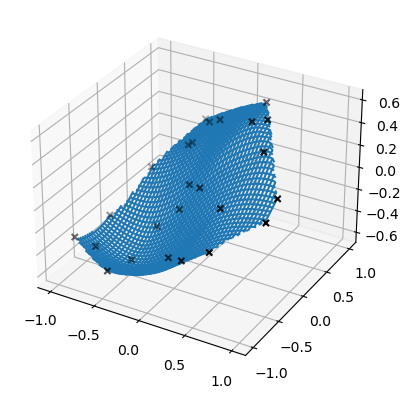

In [5]:
for method in methods:
    
    yy_interp_2D = griddata(X_scatter, yy_scatter, (xx1_grid, xx2_grid), method=method)
    
    plt.figure()
    
    lims = dict(cmap='RdBu_r', vmin=-0.4, vmax=0.4)
    plt.pcolormesh(xx1_grid, xx2_grid, yy_interp_2D, shading='flat', **lims)
    plt.scatter(X_scatter[:,0],X_scatter[:,1], marker = 'x', c = 'k')
    plt.axis('scaled')
    plt.xlim([-1.1, 1.1])
    plt.ylim([-1.1, 1.1])
    plt.autoscale(enable=True, axis='x', tight=True)
    plt.autoscale(enable=True, axis='y', tight=True)
    
    fig = plt.figure()
    ax = plt.axes(projection ="3d")
    
    ax.scatter(X_scatter[:,0],X_scatter[:,1], yy_scatter, marker = 'x', c = 'k')
    ax.plot_wireframe(xx1_grid, xx2_grid, yy_interp_2D)